In [71]:
# import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import os

print("Libraries imported successfully")

Libraries imported successfully


# Working with OpenCV

## Implementing Face Detection

In [13]:
# read the image
img = cv2.imread("people1.jpg")

# convert the image to grayscale
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [14]:
# detect the face of the image
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

faces = face_cascade.detectMultiScale(grayImage, 1.1, 4)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

In [15]:
# display the image
cv2.imshow("Detected Faces", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Converting between Color Spaces

In [16]:
# load the image
img = cv2.imread("img.jpg")

In [17]:
# convert from RGB to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

cv2.imshow("RGB2HSV Image", hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
# convert from HSV to RGB
rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

cv2.imshow("RGB2HSV Image", rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
# convert from RGB to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

cv2.imshow("RGB2HSV Image", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Edge Detection

Edge detection is very crucial in many computer vision applications, such as:
<ul>
    <li>object recognition; </li>
    <li>image segmentation; </li>
    <li> feature extraction </li>
</ul>

In [20]:
# read the image
img = cv2.imread("img.jpg")

In [21]:
# apply the Canny edge detector
edges = cv2.Canny(img, 100, 200)

cv2.imshow("RGB2HSV Image", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
# apply the Canny edge detector
edges = cv2.Canny(img, 50, 150)

cv2.imshow("RGB2HSV Image", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Blurring an Image

<p> Blurring is a technique that involves spreading out the pixels in an image to reduce detail and noise </p>
<p> Blurring is useful in the following task </p>
<ul>
    <li> smoothing out an image </li>
    <li> reducing the visibility of blemishes and imperfections</li>
    <li> Reducing the noise in an image </li>
 </ul>

In [23]:
# load the image
img = cv2.imread("img.jpg")

In [33]:
# apply a Gaussian blur
blurred = cv2.GaussianBlur(img, (5, 5), 0)  # change the values to (15, 15), 0

cv2.imshow("RGB2HSV Image", blurred)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Cropping an Image

<p> Cropping is the process of removing parts of an image
to focus on a specific area or to remove unwanted parts </p>
<p> Cropping is used to: </p>
<ul>
    <li> remove the background from an image </li>
    <li> focus on specific object </li>
    <li> remove distrating elements from an image </li>
<ul>

In [35]:
# load the image
img = cv2.imread("img.jpg")

In [36]:
# determine the dimension of the image
img.shape

(1000, 666, 3)

In [38]:
img.ndim

3

In [39]:
img.size

1998000

In [52]:
# convert the image to numpy array
img_array = np.asarray(img)

img_array

array([[[  6,   9,   7],
        [  6,   9,   7],
        [  4,   9,   8],
        ...,
        [181, 198, 211],
        [184, 200, 212],
        [184, 200, 212]],

       [[  4,   7,   5],
        [  4,   7,   5],
        [  2,   7,   6],
        ...,
        [181, 198, 211],
        [182, 198, 210],
        [183, 199, 211]],

       [[  5,   8,   6],
        [  4,   6,   6],
        [  2,   7,   6],
        ...,
        [180, 197, 210],
        [183, 199, 211],
        [184, 200, 212]],

       ...,

       [[147, 148, 146],
        [145, 146, 144],
        [143, 144, 142],
        ...,
        [100, 100, 100],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[148, 149, 147],
        [146, 147, 145],
        [143, 144, 142],
        ...,
        [ 89,  89,  89],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[150, 151, 149],
        [147, 148, 146],
        [143, 144, 142],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [40]:
#crop the image
cropped = img[100:600, 200:600]

cv2.imshow("Cropped Image", cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Rotation of an Image

In [43]:
# load the image
img = cv2.imread("img.jpg")


In [50]:
# define the rotation angle and scaling factor
angle = -180
scale_factor = 1.0

# get the image dimensions
(h, w) = img.shape[:2]

# Get the center point of rotation
center = (w//2, h//2)

# create an affine transformation matrix for rotation
M = cv2.getRotationMatrix2D(center, angle, scale_factor)

# apply the affine transformation matrix to rotate the image
rotated_image = cv2.warpAffine(img, M, (w, h))

# save the image to disk
cv2.imwrite("rotated_image.jpg", rotated_image)

cv2.imshow("RGB2HSV Image", rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Flipping an image

<p> Flipping an image is the process of reversing it 
either horizontally or vertically </p>
<p> It is used: </p>
<ul>
    <li> creating mirrored image </li>
    <li> flipping an image to correct its orientation </li>
    <li> Generating additional training data for machine learning algorithms </li>
</ul>

In [59]:
# load the image
img = cv2.imread("img.jpg")

In [60]:
# flip the image horizontally
flipped_horizontal = cv2.flip(img, 0)

# flip the image horizontally
flipped_vertical = cv2.flip(img, 1)


Text(0.5, 1.0, 'Flipped Vertically')

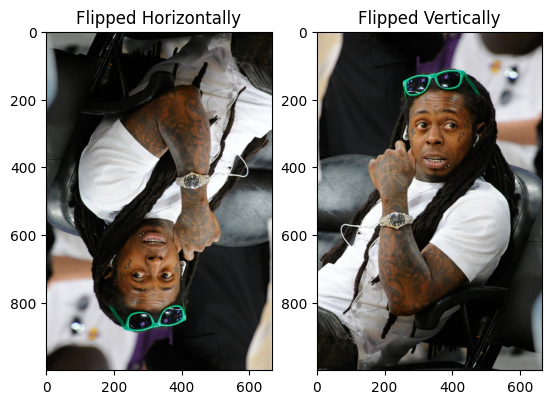

In [63]:
# create figure and axes
fig, axes = plt.subplots(1, 2)

# Display images
axes[0].imshow(cv2.cvtColor(flipped_horizontal, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(flipped_vertical, cv2.COLOR_BGR2RGB))

# set the titles
axes[0].set_title("Flipped Horizontally")
axes[1].set_title("Flipped Vertically")


## Sharpening an Image

<p> Sharpening an image is the process of increasing the 
    contrast between adjacent pixel to enhance the details in an image
</p>
<p> It is used: </p>
<ul>
    <li> improving the clarity of an image </li>
    <li> restoring details that have been lost due to blurring </li>
    <li> making an image appear more vivid and crisp </li>
</ul>

In [64]:
# load the image
img = cv2.imread("img.jpg")

In [69]:
# create a filter matrix to sharpen the image
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# apply the filter matrix to the image
sharpened = cv2.filter2D(img, -1, kernel)

Text(0.5, 1.0, 'Sharpened Image')

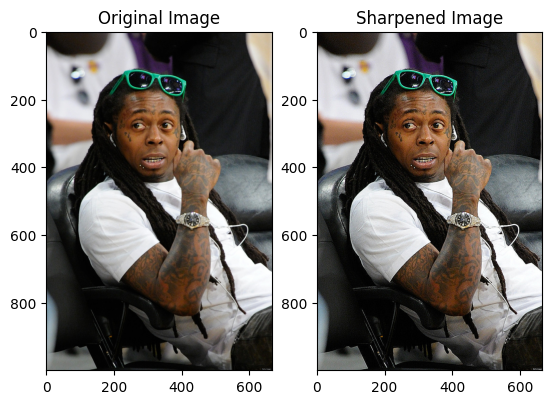

In [66]:
# create figure and axes
fig, axes = plt.subplots(1, 2)

# Display images
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))

# set the titles
axes[0].set_title("Original Image")
axes[1].set_title("Sharpened Image")


## Thresholding an image

<p> Thresholding is the processing of converting an image into a binary image, where each pixel is either black or white based on a threshold value </p>
<p> It is used: </p>
<ul>
    <li> to detect and analyze objects in image </li>
 </ul>

In [93]:
# load an image as grayscale
img = cv2.imread("img.jpg", 0)

In [94]:
# apply the simple thresholding algorithm
_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

Text(0.5, 1.0, 'Threshed Image')

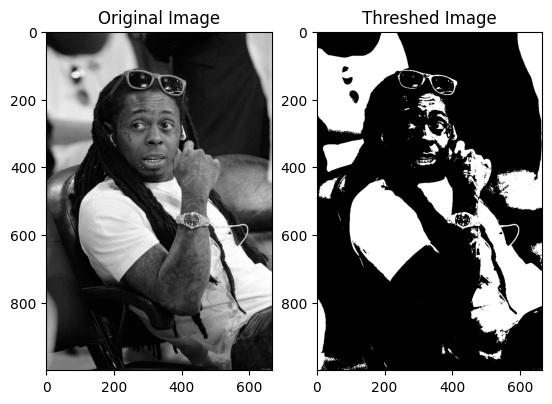

In [95]:
# create figure and axes
fig, axes = plt.subplots(1, 2)

# Display images
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

# set the titles
axes[0].set_title("Original Image")
axes[1].set_title("Threshed Image")

In [97]:
# apply the adaptive thresholding algorithm
thresh1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

Text(0.5, 1.0, 'Threshed Image using Adaptive')

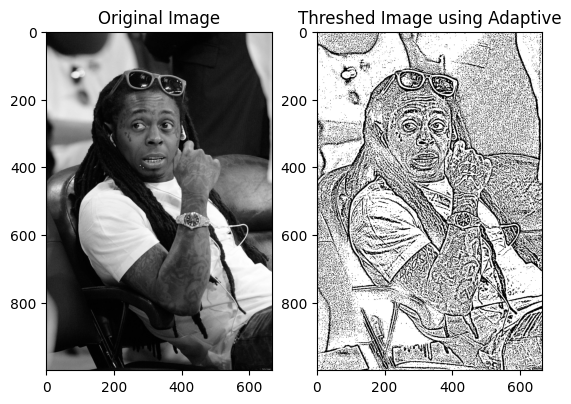

In [98]:
# create figure and axes
fig, axes = plt.subplots(1, 2)

# Display images
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(thresh1, cv2.COLOR_BGR2RGB))

# set the titles
axes[0].set_title("Original Image")
axes[1].set_title("Threshed Image using Adaptive")

# Working with Pydicom

In [76]:
# let's load the .dcm data
path = "C:/Users/infaw/Downloads/dicom-images/"
files_list = sorted(os.listdir(path))

print(files_list)

['1-01.dcm', '1-02.dcm', '1-03.dcm', '1-04.dcm', '1-05.dcm', '1-06.dcm', '1-07.dcm', '1-08.dcm', '1-09.dcm', '1-10.dcm', '1-11.dcm', '1-12.dcm', '1-13.dcm', '1-14.dcm', '1-15.dcm', '1-16.dcm', '1-17.dcm', '1-18.dcm', '1-19.dcm', '1-20.dcm', '1-21.dcm', '1-22.dcm', '1-23.dcm', '1-24.dcm', '1-25.dcm', '1-26.dcm', '1-27.dcm', '1-28.dcm', '1-29.dcm', '1-30.dcm', '1-31.dcm', '1-32.dcm', '1-33.dcm', '1-34.dcm', '1-35.dcm', 'RTSTRUCT.dcm']


In [77]:
# lets read file
ds = pydicom.dcmread(path + files_list[0])

In [80]:
# view the patients data
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7009.2401.227733523232226220904432144781
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '19600101'
(0008, 0013) Instance Creation Time              TM: '172041'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Insta

In [90]:
ds.file_meta

(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7009.2401.227733523232226220904432144781
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'

In [79]:
# let's obtain the patient's name
ds.PatientName

'ACRIN-FLT-Breast_001'

In [91]:
# patients data element can be accessed by
name = ds["PatientName"]
name.VR, name.value, name.tag, name.VM

('PN', 'ACRIN-FLT-Breast_001', (0010, 0010), 1)

In [81]:
# obtain the patient's age
ds.PatientAge

'046Y'

In [82]:
# let's obtain the element tag or keyword
ds.dir()

['AccessionNumber',
 'AcquisitionDate',
 'AcquisitionNumber',
 'AcquisitionTime',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'ClinicalTrialTimePointDescription',
 'ClinicalTrialTimePointID',
 'Columns',
 'ContentDate',
 'ContentTime',
 'ConvolutionKernel',
 'DataCollectionDiameter',
 'DeidentificationMethod',
 'DeidentificationMethodCodeSequence',
 'DistanceSourceToDetector',
 'DistanceSourceToPatient',
 'Exposure',
 'ExposureTime',
 'FilterType',
 'FocalSpots',
 'FrameOfReferenceUID',
 'GantryDetectorTilt',
 'GeneratorPower',
 'HighBit',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'ImageType',
 'InstanceCreationDate',
 'InstanceCreationTime',
 'InstanceNumber',
 'InstitutionName',
 'KVP',
 'LongitudinalTemporalInformationModified',
 'Manufacturer',
 'ManufacturerModelName',
 'Modality',
 'OperatorsName',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientIdentityRemoved',
 'PatientName',
 'PatientPosition',
 'PatientSex',
 'PatientWeight',
 'PhotometricIn

In [84]:
# obtain the name of the patient using the tag
ds[0x10, 0x10].value

'ACRIN-FLT-Breast_001'

In [85]:
# get the pixel data
ds.PixelData

b'0\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\x

In [86]:
type(ds.PixelData)

bytes

In [87]:
# Pixel is sometime difficult to deal with, as a result
# pixel_array is used
ds.pixel_array

array([[-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       ...,
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000]], dtype=int16)

In [88]:
# get the shape
ds.pixel_array.shape

(512, 512)

In [92]:
# convert the ds into an image
image = ds.pixel_array

print(image.min())
print(image.max())

-2000
2306


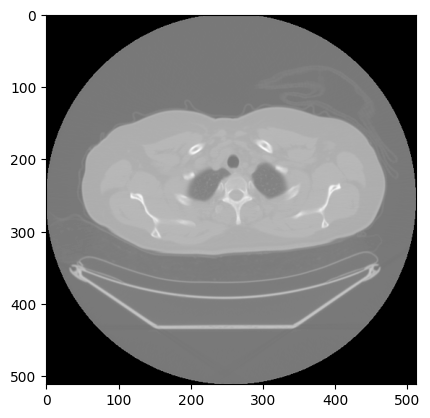

In [89]:
# let's display the image
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

In [1]:
!pip install opencv-python

In [2]:
!pip install pydicom